<h2>Exploring the dataset!</h2>

<h3>Data</h3>
<li>The original data set is an aggregate of issued loans from Lending Club through 2007-2015. It contains <b style="color:blue">890</b> thousand observations and <b style="color:blue">75</b> variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns',None)
sns.set(style="white", color_codes=True)
%matplotlib inline

df = pd.read_csv('../input/loan.csv') 

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h3>Loan Information</h3>

<h4>Loan Amount</h4>

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


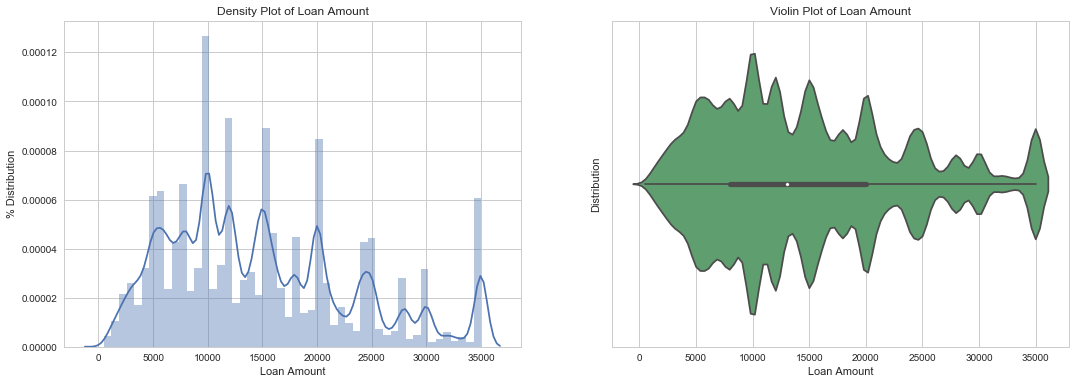

In [2]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1,2,figsize=(18,6))
sns.distplot(df.loan_amnt, ax=axs[0])
axs[0].set(xlabel='Loan Amount', 
       ylabel='% Distribution',title='Density Plot of Loan Amount')
sns.violinplot(df.loan_amnt,color="g", ax=axs[1])
axs[1].set(xlabel='Loan Amount', 
       ylabel='Distribution',title='Violin Plot of Loan Amount')
plt.legend()
plt.show()

<h4>Loan Status</h4>

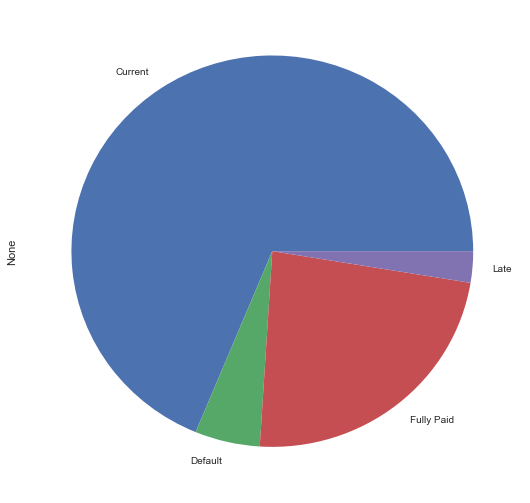

In [3]:
plt.rcParams['figure.figsize'] = (9,9)
def status_class(text):
    if text=='Fully Paid':
        return 'Fully Paid'
    elif text=='Charged Off' or text=='Default':
        return 'Default'
    elif text=='Current' or text=='Issued':
        return 'Current'
    else:
        return 'Late'

df['status_class']=df['loan_status'].apply(status_class)
df.groupby('status_class').size().plot(kind='pie')

<h4>Purpose</h4>

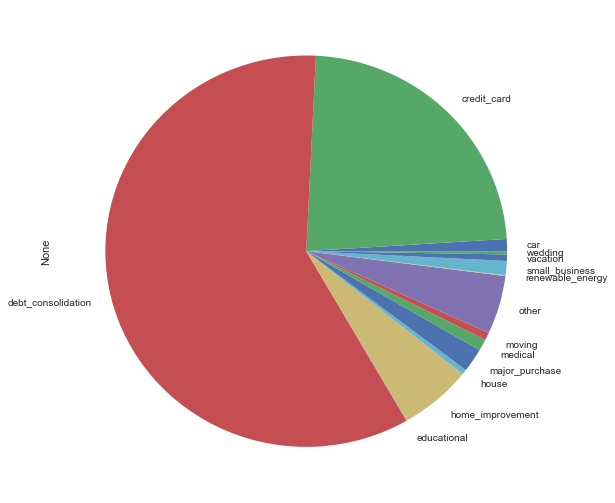

In [4]:
plt.rcParams['figure.figsize'] = (9,9)
df.groupby('purpose').size().plot(kind='pie')

<h4>Word Cloud of Title</h4>

In [5]:
import nltk
import collections as co
l = []
df['title'].apply(lambda x: l.append(x))
s=str(l)

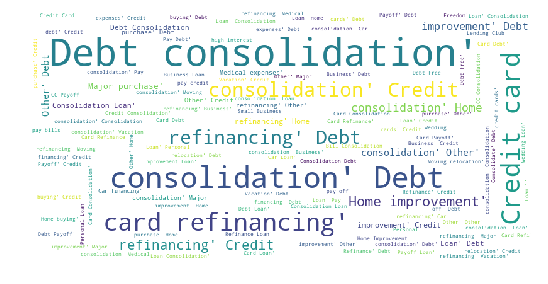

In [6]:
plt.rcParams['figure.figsize'] = (9,6)
from wordcloud import WordCloud, STOPWORDS

text = s

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', max_words=120, width=800, height=400).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h3>Borrower Information</h3>

<h4>Employment Length</h4>

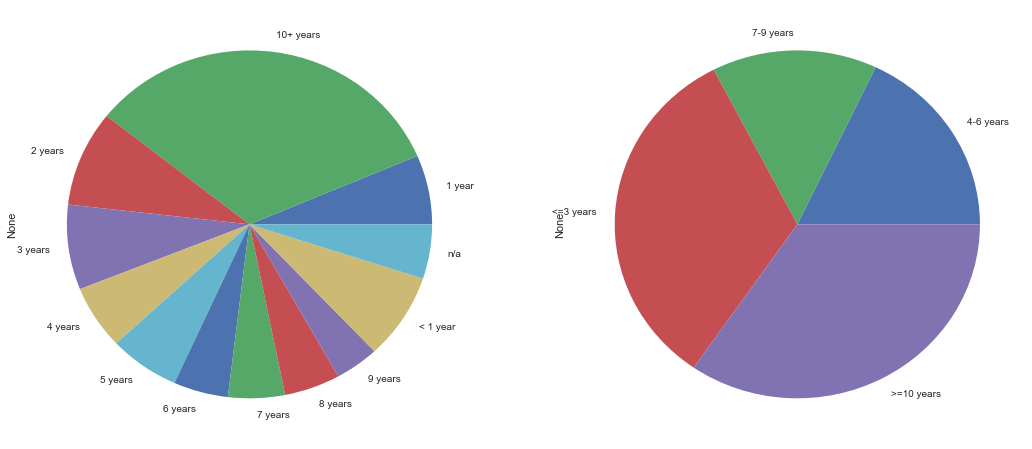

In [7]:
fig, axs = plt.subplots(1,2,figsize=(18,8))
df.groupby('emp_length').size().plot(kind='pie',ax=axs[0])

def emp_length_class(text):
    if text=='< 1 year' or text=='1 year' or text=='2 years' or text=='3 years':
        return '<=3 years'
    elif text=='4 years' or text=='5 years' or text=='6 years':
        return '4-6 years'
    elif text=='7 years' or text=='8 years' or text=='9 years':
        return '7-9 years'
    elif text=='10+ years':
        return '>=10 years'
    else:
        return None
df['emp_length_class']=df['emp_length'].apply(emp_length_class)
df.groupby('emp_length_class').size().plot(kind='pie',ax=axs[1])

plt.show()

<h4>Annual Income</h4>

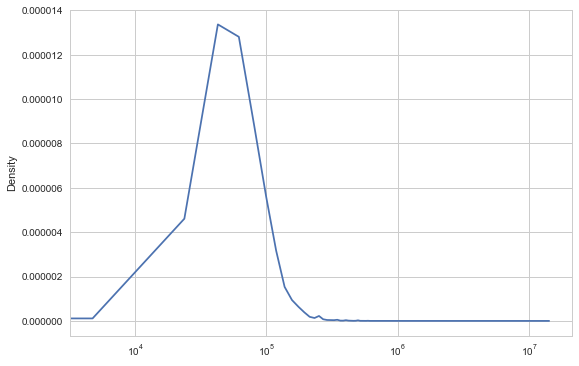

In [8]:
plt.rcParams['figure.figsize'] = (9,6)
df["annual_inc"].plot.density(logx = True)

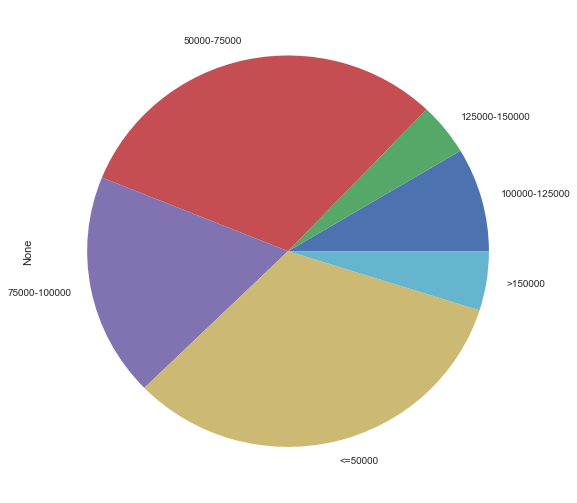

In [9]:
plt.rcParams['figure.figsize'] = (9,9)
def inc_class(num):
    if num <= 50000:
        return '<=50000'
    elif num <= 75000:
        return '50000-75000'
    elif num <= 100000:
        return '75000-100000'
    elif num <= 125000:
        return '100000-125000'
    elif num <= 150000:
        return '125000-150000'
    else:
        return '>150000'

df['inc_class']=df['annual_inc'].apply(inc_class)
df.groupby('inc_class').size().plot(kind='pie')

<h3>Interest Rate</h3>

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


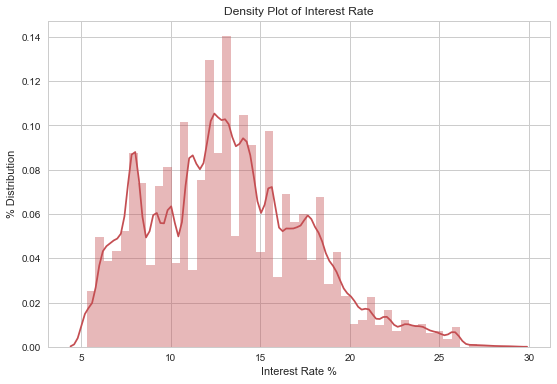

In [10]:
plt.rcParams['figure.figsize'] = (9,6)
ax=sns.distplot(df.int_rate, color="r")
ax.set(xlabel='Interest Rate %', 
       ylabel='% Distribution',title='Density Plot of Interest Rate')

plt.legend();

<h4>Interest Rate by Term / Employment Length / Application Type / Purpose</h4>

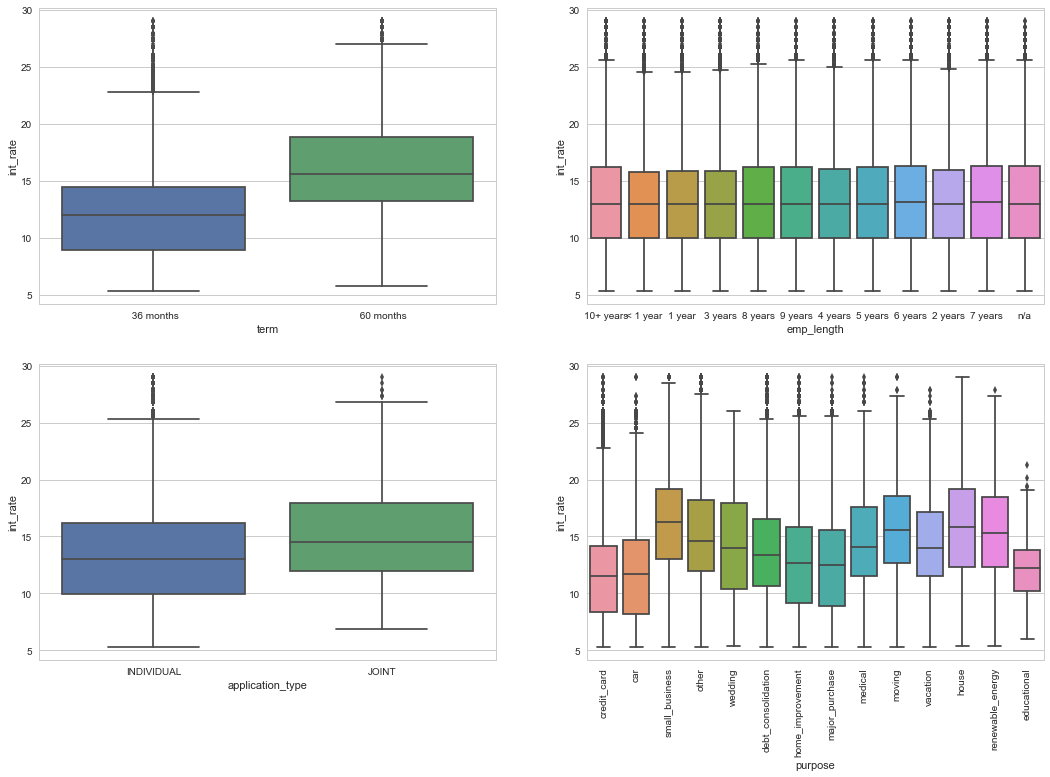

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(18,12))

sns.boxplot(x='term', y='int_rate', data=df, ax=axes[0, 0])
sns.boxplot(x='emp_length', y='int_rate', data=df, ax=axes[0, 1])
plt.xticks(rotation=50)
sns.boxplot(x='application_type', y='int_rate', data=df, ax=axes[1, 0])
plt.xticks(rotation=90)
sns.boxplot(x='purpose', y='int_rate', data=df, ax=axes[1, 1])
plt.xticks(rotation=90)

plt.show()

<h3>Credit Grade</h3>

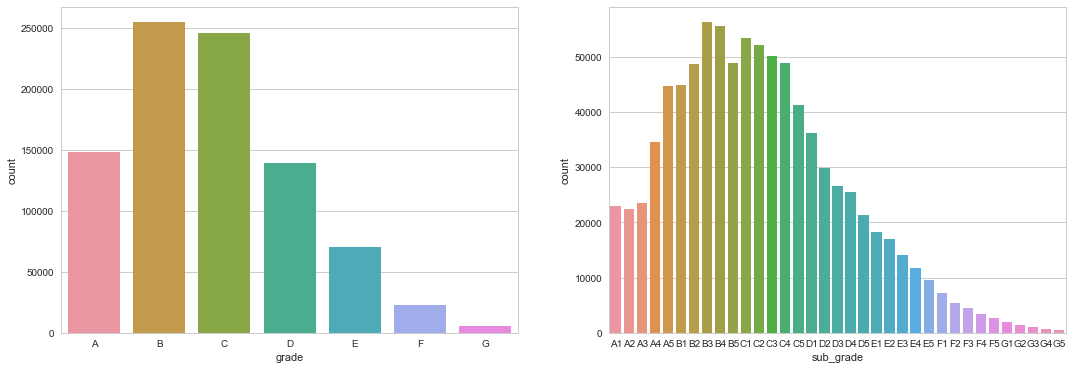

In [12]:
fig, axs = plt.subplots(1,2,figsize=(18,6))
sns.countplot(df['grade'], order = ('A','B','C','D','E','F','G'), ax=axs[0])

l = []
for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    for j in ['1', '2', '3', '4', '5']:
        l.append(i+j)     
sns.countplot(df['sub_grade'], order = l, ax=axs[1])

plt.show()

<h4>Interest Rate by Grade</h4>

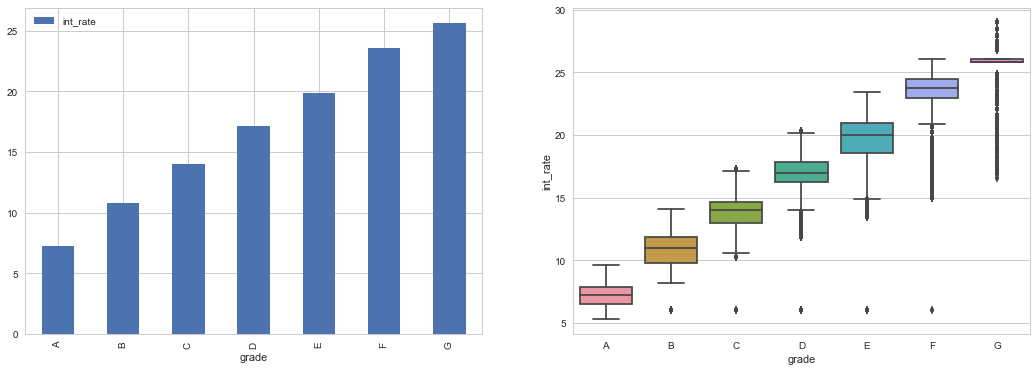

In [13]:
fig, axs = plt.subplots(1,2,figsize=(18,6))
df[['grade','int_rate']].groupby('grade').mean().plot(kind='bar', ax=axs[0])
sns.boxplot(x='grade', y='int_rate', data=df, order = 'ABCDEFG', ax=axs[1])
plt.show()

<h4>Loan Amount by Grade</h4>

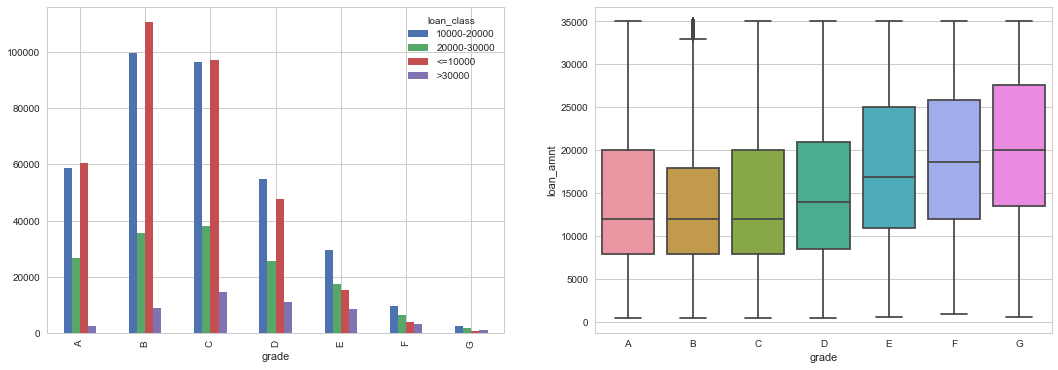

In [14]:
fig, axs = plt.subplots(1,2,figsize=(18,6))

def loan_class(num):
    if num <= 10000:
        return '<=10000'
    elif num <= 20000:
        return '10000-20000'
    elif num <= 30000:
        return '20000-30000'
    else:
        return '>30000'
df['loan_class']=df['loan_amnt'].apply(loan_class)
df.groupby(['grade','loan_class']).size().unstack().plot(kind='bar', ax=axs[0])
sns.boxplot(x='grade', y='loan_amnt', data=df, order = 'ABCDEFG', ax=axs[1])
plt.show()

<h4>Term by Grade</h4>

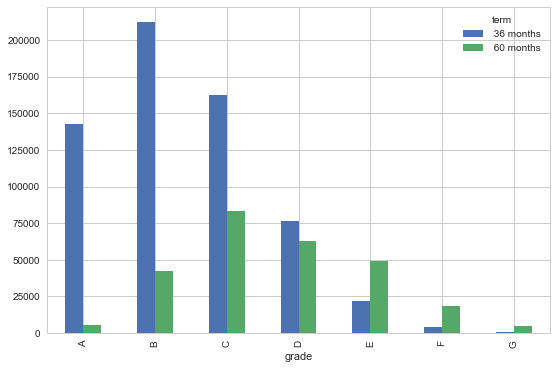

In [15]:
df.groupby(['grade','term']).size().unstack().plot(kind='bar')

<h3>Default Situation</h3>

<h4>Default by Grade</h4>

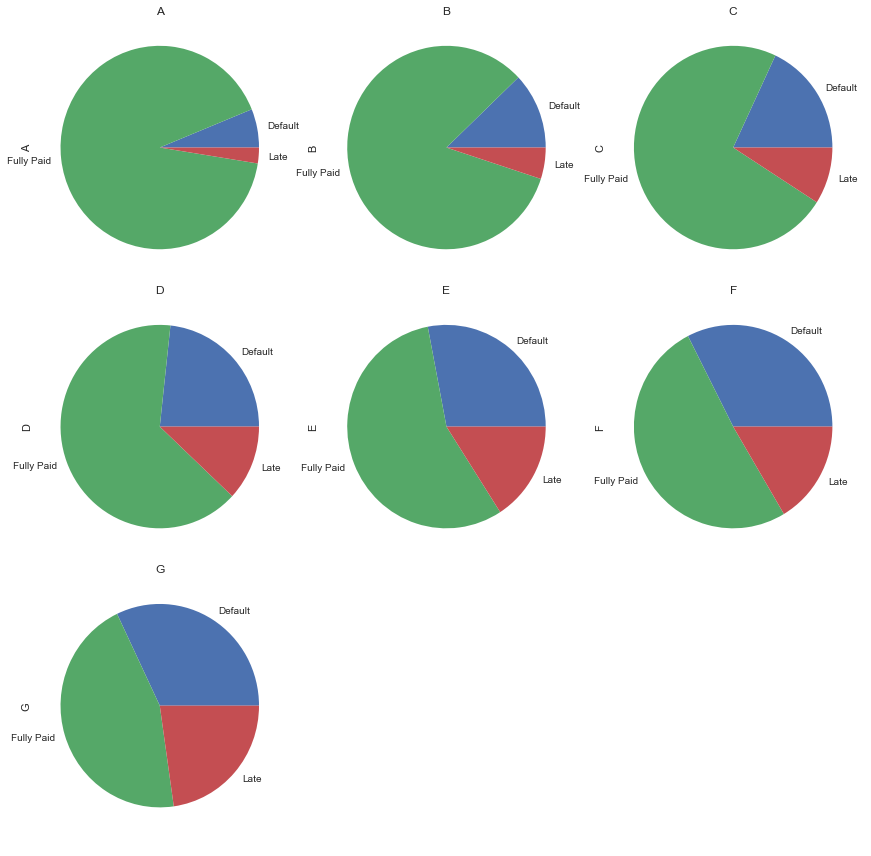

In [16]:
grade_status = df[df['status_class']!='Current'].groupby(['status_class','grade']).size().unstack()
COL_NUM = 3
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (grade, status_count) in enumerate(grade_status.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    status_count.plot(kind='pie', ax=ax)
    ax.set_title(grade)

axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout()

<h4>Default Rate by Purpose</h4>

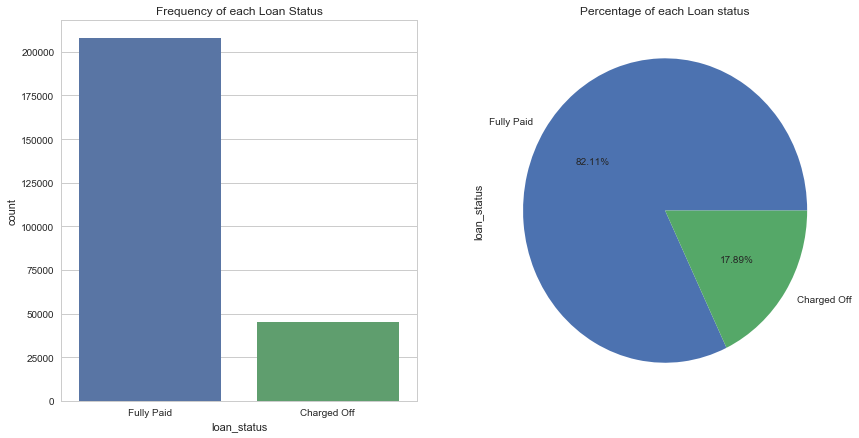

In [17]:
#Among 10 kinds of purposes, we only cares about 'Fully paid' and 'Chareged off'
df_sub = df[(df["loan_status"] == "Fully Paid") |(df["loan_status"] == "Charged Off")]
filtered_loans = df_sub
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=filtered_loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
filtered_loans.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [18]:
#Assign dummy variable to loan status
mapping_dictionary = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1}}
filtered_loans = filtered_loans.replace(mapping_dictionary)

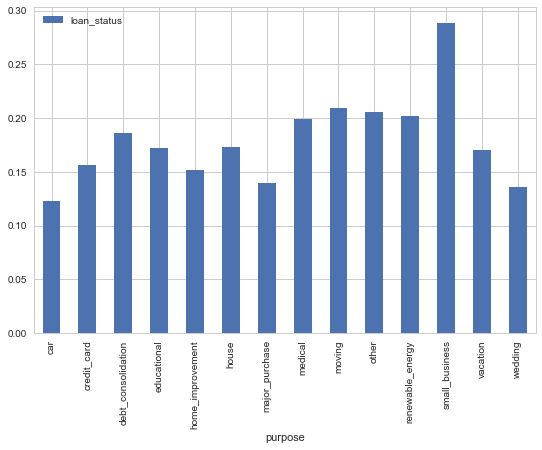

In [19]:
plt.rcParams['figure.figsize'] = (9,6)
purpose_=pd.pivot_table(filtered_loans, index = 'purpose',values = 'loan_status', aggfunc=[np.sum,len,np.mean])
plt.show(purpose_['mean'].plot(kind = 'bar')) 

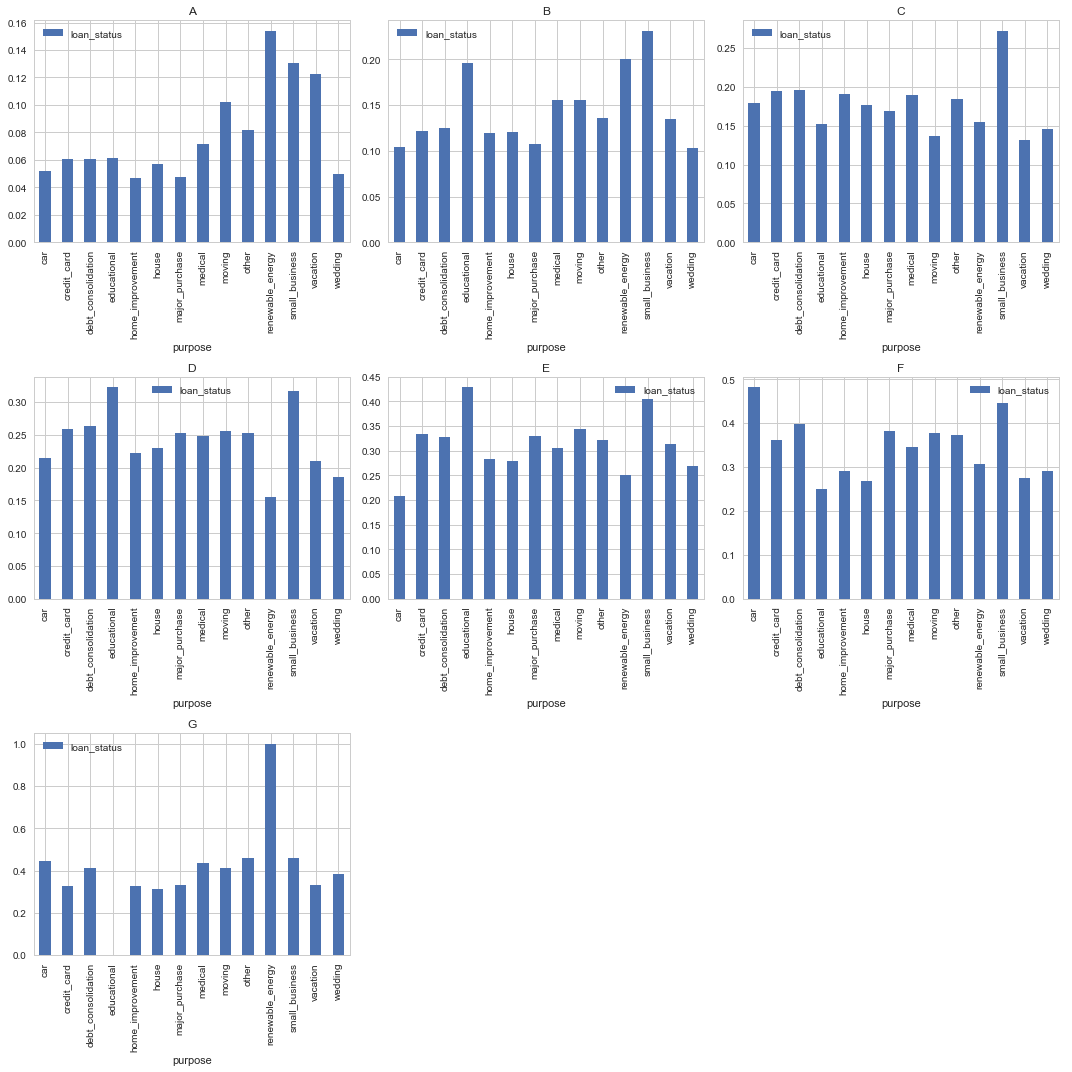

In [20]:
COL_NUM = 3
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

for i,g in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G']):
    p = pd.pivot_table(filtered_loans[filtered_loans['grade'] == g], index = 'purpose', values = 'loan_status', aggfunc=[np.sum,len,np.mean])['mean']
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    p.plot(kind='bar', ax=ax)
    ax.set_title(g)

axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout()

<h4>Default by State</h4>

In [21]:
import itertools
from sklearn import preprocessing
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [22]:
State_List = []
for x in df['addr_state']:
    if x not in State_List:
        State_List.append(x)

Loan_Amount = []
Average_Balance = []
Default_Rate = []
Weighted_Rate = []
Average_Income = []
Average_Employment_Length = []
Average_DTI = []
Average_Inq_12 = []
Average_Inq_6 = []

for x in State_List:
    new_df = df[df['addr_state'] == x]
    
    Loan_Sum = sum(new_df['funded_amnt'])
    Loan_Amount.append(Loan_Sum)
    
    Average_Balance.append(Loan_Sum/len(new_df['funded_amnt']))
    
    Defaults = []
    for value in new_df.loan_status:
        if value == 'Default':
            Defaults.append(1)
        if value == 'Charged Off':
            Defaults.append(1)
        if value == 'Late (31-120 days)':
            Defaults.append(1)   
        if value == 'Late (16-30 days)':
            Defaults.append(1)
        if value == 'Does not meet the credit policy. Status:Charged Off':
            Defaults.append(1) 
    Default_R = len(Defaults) / len(new_df.loan_status)  
    Default_Rate.append(Default_R)
    
    new_df['weighted'] = (new_df['int_rate']/100)*new_df['funded_amnt']
    Weighted_Sum = sum(new_df['weighted'])
    Weighted_i_rate = Weighted_Sum / Loan_Sum
    Weighted_Rate.append(Weighted_i_rate)
    
    Income_Average = np.mean(new_df['annual_inc'])
    Average_Income.append(Income_Average)

    Employ_Length = []
    for term in new_df.emp_length:
        if term == '10+ years':
            Employ_Length.append(10)
        if term == '< 1 year':
            Employ_Length.append(0.5)    
        if term == '1 year':
            Employ_Length.append(1)
        if term == '3 years':
            Employ_Length.append(3)
        if term == '8 years':
            Employ_Length.append(8)
        if term == '9 years':
            Employ_Length.append(9)    
        if term == '4 years':
            Employ_Length.append(4)
        if term == '5 years':
            Employ_Length.append(5)
        if term == '6 years':
            Employ_Length.append(6)
        if term == '2 years':
            Employ_Length.append(2)    
        if term == '7 years':
            Employ_Length.append(7)
        if term == 'n/a':
            Employ_Length.append(0)  
            
    Average_Employment_Length.append(np.mean(Employ_Length))        
    
    DTI_Average = np.mean(new_df['dti'])
    Average_DTI.append(DTI_Average)
    
    inquiry_average = np.mean(new_df['inq_last_12m'])
    Average_Inq_12.append(inquiry_average)
    
    inquiry_average_6 = np.mean(new_df['inq_last_6mths'])
    Average_Inq_6.append(inquiry_average_6)
    
from collections import OrderedDict
combine_data = OrderedDict([ ('Loan_Funding',Loan_Amount),
                         ('Average_Balance', Average_Balance),
                         ('Default_Rate',  Default_Rate),
                         ('Weighted_Rate', Weighted_Rate),
                         ('Average_Income', Average_Income),
                         ('Average_Employment_Length', Average_Employment_Length),
                         ('Average_DTI', DTI_Average),
                         ('12m_Inquiries', Average_Inq_12),
                         ('6m_Inquiries', Average_Inq_6),   
                         ('code', State_List)])

df_plot = pd.DataFrame.from_dict(combine_data)
df_plot = df_plot.round(decimals=2)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [23]:
for col in df_plot.columns:
    df_plot[col] = df_plot[col].astype(str)

    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_plot['text'] = df_plot['code'] + '<br>' +\
    '<br>'+'Weighted Rate: '+df_plot['Weighted_Rate']+'<br>'+\
    'Inquiries Last 12m: '+df_plot['12m_Inquiries']+'<br>'+\
    'Inquiries Last 6m: '+df_plot['6m_Inquiries']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = True,
        locations = df_plot['code'],
        z = df_plot['Default_Rate'], #.astype(int),
        locationmode = 'USA-states',
        text = df_plot['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
        title = 'Lending Club Portfolio<br> Default Rate By State <br> (Hover over state for other metrics)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

<h3>Other Maps</h3>

In [24]:
for col in df_plot.columns:
    df_plot[col] = df_plot[col].astype(str)

    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_plot['text'] = df_plot['code'] + '<br>' +\
    'Avg Balance Per Borrower ($ USD): '+df_plot['Average_Balance']+'<br>'+\
    'Avg Employment Term Per Borrower (Years): '+df_plot['Average_Employment_Length']+'<br>'+\
    'Avg Annual Income Per Borrower ($ USD): '+df_plot['Average_Income']
    

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_plot['code'],
        z = df_plot['Loan_Funding'], 
        locationmode = 'USA-states',
        text = df_plot['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]

layout = dict(
        title = 'Lending Club Portfolio<br> Total Funded By State <br> (Hover over state for other metrics)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [25]:
state_average_int_rate=df.groupby('addr_state').agg({'int_rate':np.average,'id':np.count_nonzero,'annual_inc':np.average})
state_average_int_rate.reset_index(inplace=True)
state_average_int_rate['id']=state_average_int_rate['id'].astype(str)
state_average_int_rate['interest']=state_average_int_rate['int_rate']
state_average_int_rate['int_rate']= 'Average Interest Rate: ' + \
state_average_int_rate['int_rate'].apply(lambda x: str(round(x,2)))+ "%"
state_average_int_rate['annual_inc']=(state_average_int_rate['annual_inc']/1000.0)
state_average_int_rate['annual_inc']=state_average_int_rate['annual_inc'].apply(lambda x: str(round(x,2)))
state_average_int_rate['text']='Number of Applicants: ' + state_average_int_rate['id']+'<br>'+ \
'Average Annual Inc: $'+ state_average_int_rate['annual_inc']+'k'

scl= [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_average_int_rate['addr_state'],
        z = state_average_int_rate['interest'].astype(float),
        text=state_average_int_rate['text'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Interest Rates")
        ) ]

layout = dict(
        title = '<b>Interest Rate by US States</b><br>Additional Details: <br> Avreage Annual Inc \t Number of Applicants',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
        
             ))
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

<h3>Correlation Matrix</h3>

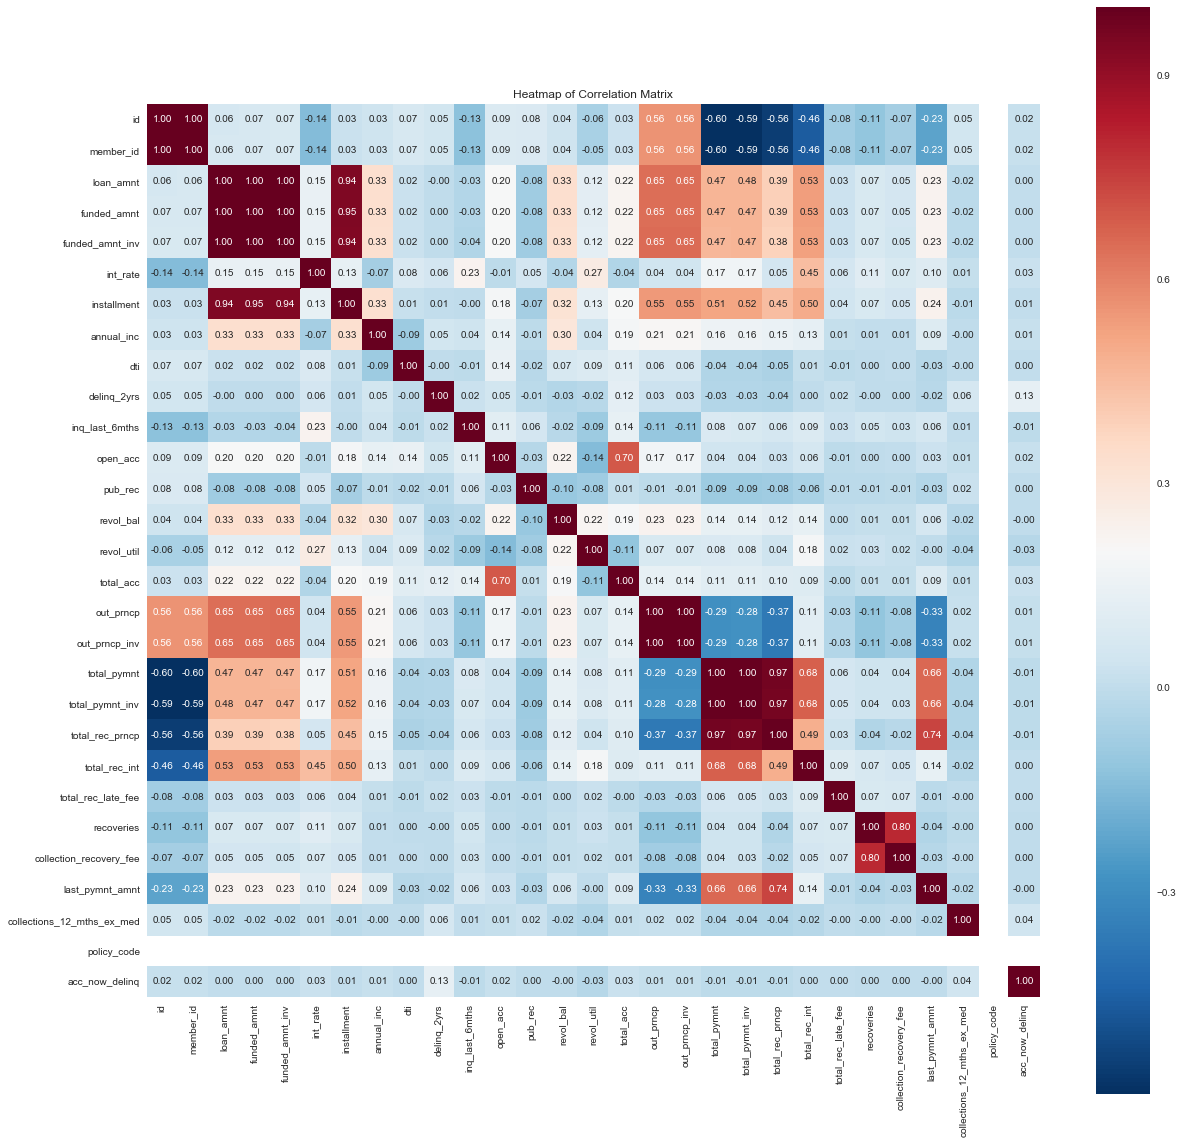

In [26]:
df2 = df.drop(['dti_joint','verification_status_joint','annual_inc_joint','il_util','mths_since_rcnt_il','all_util',
               'max_bal_bc','open_rv_24m','open_rv_12m','total_cu_tl','total_bal_il','open_il_24m','open_il_12m',
               'open_il_6m','open_acc_6m','inq_fi','inq_last_12m','desc','mths_since_last_record','mths_since_last_major_derog',
               'mths_since_last_delinq','next_pymnt_d'],axis=1)
df2 = df2.drop(['emp_title','total_rev_hi_lim','tot_coll_amt','tot_cur_bal'],axis=1)

plt.rcParams['figure.figsize'] = (20,20)
corr=df2.corr()
corr = (corr)
sns.set_palette("RdBu_r")
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10}, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap="RdBu_r").set_title('Heatmap of Correlation Matrix')

#  sns.plt.title('Heatmap of Correlation Matrix') 

<h3>Data Cleaning</h3>

In [27]:
import pandas as pd
df = pd.read_csv('../input/loan.csv') 

df=df.drop(['id','member_id','funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d','zip_code',
            'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
            'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','desc','url','title',
            'initial_list_status','pymnt_plan','policy_code','application_type','earliest_cr_line','last_credit_pull_d',
            'next_pymnt_d','addr_state'],axis=1)

df=df.dropna(thresh=len(df)/2,axis=1)
df=df.dropna()

def status_binary(text):
    if text=='Fully Paid':
        return 0
    elif text=='Current' or text=='Issued':
        return -1
    else:
        return 1
df['loan_status']=df['loan_status'].apply(status_binary)
df=df[df['loan_status']!=-1]

def purpose_class(text):
    if text=='debt_consolidation' or text=='credit_card':
        return 'refinance'
    elif text=='house' or text=='home_improvement' or text=='renewable_energy' or text=='moving':
        return 'home'
    elif text=='car' or text=='major_purchase':
        return 'major_purchase'
    else:
        return 'other'
df['purpose']=df['purpose'].apply(purpose_class)

dummy_df=pd.get_dummies(df[['home_ownership','verification_status','purpose','term']])
df=df.drop(['home_ownership','verification_status','purpose','term'],axis=1)
df=pd.concat([df,dummy_df],axis=1)

mapping_dict={
    'emp_length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
        'n/a':0
    },
    'grade':{
        'A':1,
        'B':2,
        'C':3,
        'D':4,
        'E':5,
        'F':6,
        'G':7,
    }
}
df=df.replace(mapping_dict)

cols = list(df)
cols.insert(0, cols.pop(cols.index('loan_status')))
df = df.ix[:, cols]
df.head()

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,loan_status,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_home,purpose_major_purchase,purpose_other,purpose_refinance,term_ 36 months,term_ 60 months
42538,0,12000.0,13.53,407.40,2,10,40000.0,16.94,0.0,0.0,7.0,2.0,5572.0,68.8,32.0,0.0,0.0,15386.0,13605.0,8100.0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
42544,0,3000.0,12.85,100.87,2,10,25000.0,24.68,0.0,0.0,5.0,2.0,2875.0,54.2,26.0,0.0,0.0,154.0,19530.0,5300.0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0
42546,0,28000.0,7.62,872.52,1,5,325000.0,18.55,0.0,1.0,15.0,0.0,29581.0,54.6,31.0,0.0,0.0,0.0,799592.0,54200.0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
42549,0,24000.0,13.53,814.80,2,10,100000.0,22.18,0.0,0.0,14.0,0.0,21617.0,76.7,39.0,0.0,0.0,539.0,199834.0,28200.0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
42550,1,8000.0,10.99,261.88,2,2,33000.0,15.75,0.0,1.0,9.0,1.0,7203.0,34.6,16.0,0.0,0.0,0.0,15949.0,20800.0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0


<h3>Machine Learning</h3>

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,1:34]
y_train = train[['loan_status']]
x_test = test.iloc[0:,1:34]
y_test = test[['loan_status']]

In [34]:
x_test.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_home,purpose_major_purchase,purpose_other,purpose_refinance,term_ 36 months
189990,8500.0,13.11,286.85,2,10,54000.0,15.18,0.0,0.0,7.0,0.0,14493.0,63.6,20.0,0.0,0.0,0.0,28421.0,22800.0,0,0,0,0,1,0,1,0,0,0,0,0,1,1
566317,17800.0,13.33,408.02,3,10,59294.0,14.45,0.0,1.0,9.0,1.0,327.0,2.8,24.0,0.0,0.0,0.0,16348.0,11800.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
44567,30000.0,14.98,1039.67,3,0,99540.6,9.44,1.0,2.0,11.0,0.0,18069.0,67.9,30.0,0.0,0.0,0.0,431817.0,26600.0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
421185,10000.0,13.65,230.88,3,6,52000.0,16.32,0.0,0.0,9.0,0.0,9468.0,25.8,23.0,0.0,0.0,433.0,145785.0,36700.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
145275,14300.0,10.16,462.50,2,10,75000.0,14.51,0.0,0.0,22.0,0.0,37071.0,54.8,32.0,0.0,0.0,0.0,294464.0,67700.0,0,1,0,0,0,0,0,1,0,0,0,0,1,1


In [31]:
method = ['Decision Tree','Random Forests','Logistic Regression']
false_paid=pd.DataFrame([[0,0,0],[0,0,0]],columns=method,index=['train','test'])
default_identified=pd.DataFrame([[0,0,0],[0,0,0]],columns=method,index=['train','test'])

<h3>Decision Tree</h3>

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 5,criterion='entropy',class_weight={0: 0.15, 1: 0.85})
model.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix
import numpy as np
p_train=model.predict(x_train)
p_test = model.predict(x_test)

fully_paid,default = confusion_matrix(p_train,np.array(y_train))
false_paid.loc['train','Decision Tree']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['train','Decision Tree']=100*default[1]/(default[1]+fully_paid[1])

fully_paid,default = confusion_matrix(p_test,np.array(y_test))
false_paid.loc['test','Decision Tree']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['test','Decision Tree']=100*default[1]/(default[1]+fully_paid[1])

<h3>Random Forests</h3>

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 6,n_estimators= 10,class_weight={0: 0.15, 1: 0.85})
model.fit(x_train,np.ravel(y_train))

from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)

fully_paid,default = confusion_matrix(p_train,np.array(y_train))
false_paid.loc['train','Random Forests']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['train','Random Forests']=100*default[1]/(default[1]+fully_paid[1])

fully_paid,default = confusion_matrix(p_test,np.array(y_test))
false_paid.loc['test','Random Forests']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['test','Random Forests']=100*default[1]/(default[1]+fully_paid[1])

<h3>Logistic Regression</h3>

In [36]:
from sklearn.linear_model import LogisticRegression
import numpy as np
model = LogisticRegression(class_weight={0: 0.15, 1: 0.85})
model.fit(x_train, np.ravel(y_train))

from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)

fully_paid,default = confusion_matrix(p_train,np.array(y_train))
false_paid.loc['train','Logistic Regression']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['train','Logistic Regression']=100*default[1]/(default[1]+fully_paid[1])

fully_paid,default = confusion_matrix(p_test,np.array(y_test))
false_paid.loc['test','Logistic Regression']=100*fully_paid[1]/(fully_paid[0]+fully_paid[1])
default_identified.loc['test','Logistic Regression']=100*default[1]/(default[1]+fully_paid[1])

<h3>Comparison</h3>

In [37]:
print('The portion of predicted fully paid loans that will default(%)')
print(false_paid)
print('\n')
print('The portion of default loans that are correctly identified(%)')
print(default_identified)

The portion of predicted fully paid loans that will default(%)
       Decision Tree  Random Forests  Logistic Regression
train      11.375856         7.66582            10.221579
test       11.717453         8.24947            10.034870


The portion of default loans that are correctly identified(%)
       Decision Tree  Random Forests  Logistic Regression
train      89.817371       96.560197            95.349426
test       89.557449       96.314046            95.402911


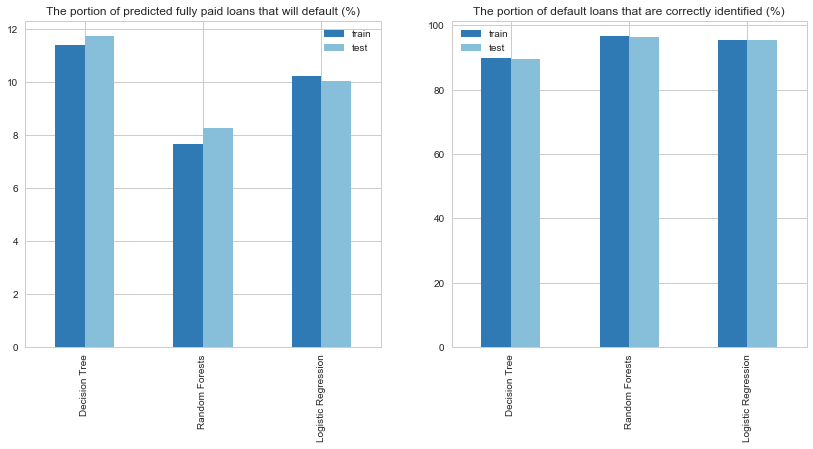

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(1,2,figsize=(14,6))
false_paid.T.plot(kind='bar',ax=axs[0])
axs[0].set_title('The portion of predicted fully paid loans that will default (%)')
default_identified.T.plot(kind='bar',ax=axs[1])
axs[1].set_title('The portion of default loans that are correctly identified (%)')
plt.show()

<h3>Further Consideration</h3>

As a investor, We can use data to make investing decisions.

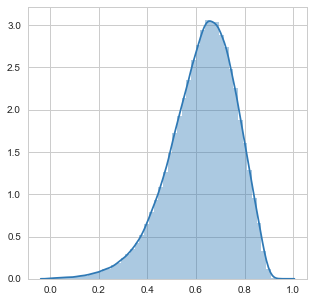

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
X = df.drop(['loan_status'],axis=1)
Y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
weight = y_train*4 + 1 
logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
logreg.fit(X_train, y_train, sample_weight=weight)
y_pred = logreg.predict(X_test)
plt.figure(figsize=(5,5))
sns.distplot(logreg.predict_proba(X_train)[:,1])
plt.show()

In [ ]:
def profit_predict(X_test, y_test, y_pred, recovery_rate = 0):
    pv = X_test[np.logical_not(y_pred)]['loan_amnt'].sum()
    fv = sum(X_test[np.logical_and(np.logical_not(y_p), np.logical_not(y_test))]['loan_amnt'] * 
                    (X_test[np.logical_and(np.logical_not(y_p), np.logical_not(y_test))]['int_rate'] + 100)/100)
    return fv / pv - 1

import numpy as np
profit = []
for i in np.arange(0.02, 1, 0.01):
    y_p = logreg.predict_proba(X_test)[:,1] > i
    profit.append(profit_predict(X_test, y_test, y_p))
plt.figure(figsize=(5,5))
plt.plot(np.arange(0.02, 1, 0.01), profit)
plt.show()

If we choose default probability of 8% as threshold, we can achieve a <b>5%</b> annul return!